some quick tests with Viero+2022 results from SIMSTACK3

In [22]:
import pickle
import os, sys
from astropy import units as u, constants as c
import numpy as np
from matplotlib import pyplot as plt

In [32]:
with open("simstack.pkl", "rb") as f:
    results = pickle.load(f)
results.keys(), results['wvs'], len(results['seds']), list(results['seds'].keys())[0]

(dict_keys(['wvs', 'seds', 'stds']),
 [24.0, 100.0, 160.0, 250.0, 350.0, 500.0, 850.0],
 96,
 'z=0.01_0.5__logM=9.5_10.0__SF?=0')

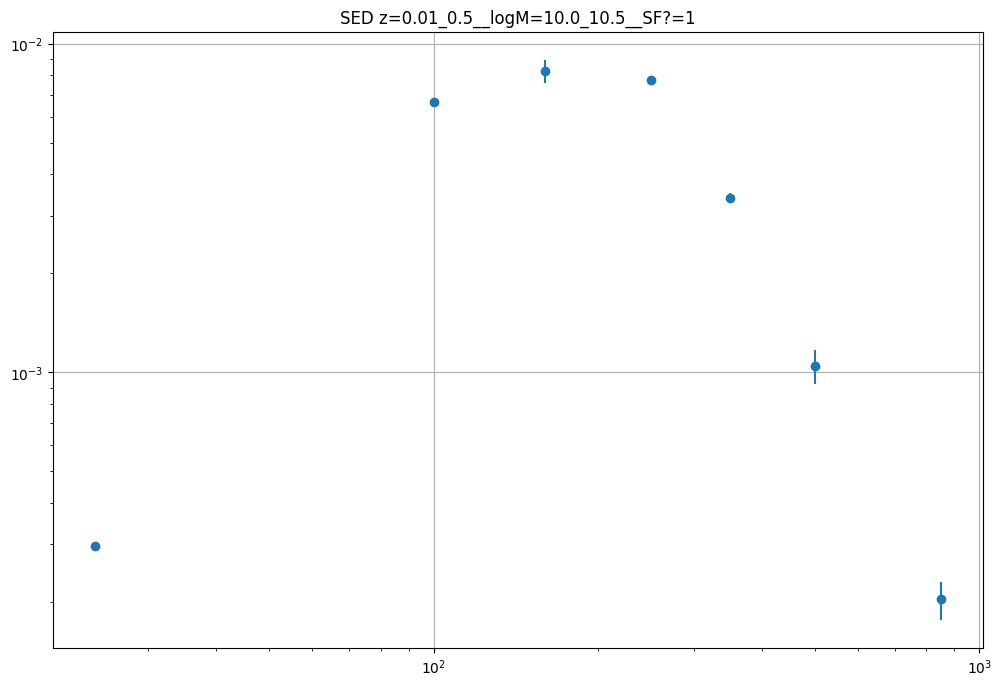

In [46]:
ind = 3
key_to_plot = list(results['seds'].keys())[ind]
plt.figure(figsize=(12, 8))
plt.errorbar(results['wvs'], results['seds'][key_to_plot], yerr=results['stds'][key_to_plot], fmt='o', label=key_to_plot)
plt.title(f"SED {key_to_plot}")
plt.grid()
plt.loglog()
plt.show()
plt.close()

units are in Jy/beam, comparable plots to Figure 1 from Viero+22 paper

Compare to COBE FIRAS FIRB measurements

In [18]:
firas = np.loadtxt('../data/FIRAS_CIB_spectrum.dat', comments='#')
firas.shape

(200, 4)

In [19]:
# first column is freq in cm^-1, rest columns are intensity in MJy/sr
wavs = (1e4 / firas[:,0]) * u.micron
int1 = firas[:,1] * u.MJy / u.sr
int2 = firas[:,2] * u.MJy / u.sr
int3 = firas[:,3] * u.MJy / u.sr

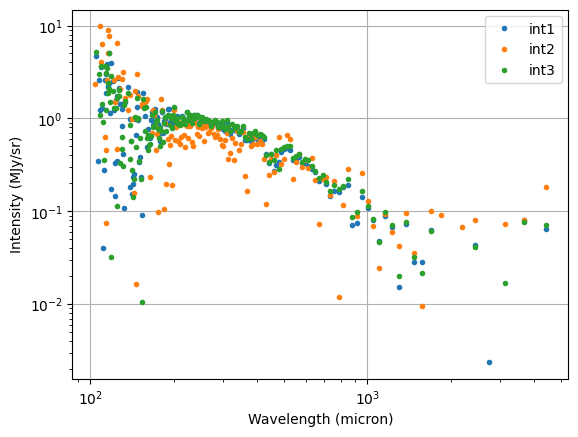

In [20]:
plt.figure()
plt.plot(wavs, int1, label='int1', marker='.', ls='none')
plt.plot(wavs, int2, label='int2', marker='.', ls='none')
plt.plot(wavs, int3, label='int3', marker='.', ls='none')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Intensity (MJy/sr)')
plt.loglog()
plt.legend()
plt.grid()
plt.show()
plt.close()

In [51]:
beam_sizes = np.array([1.55, 2.03, 4.66, 9.94, 17.65, 37.30, 5.68]) * 1e-9
# values from the Viero+22 paper 2203.14312, Viero+13 paper 1304.0446, and 
# SCUBA beam from https://academic.oup.com/mnras/article/465/2/1789/2454739

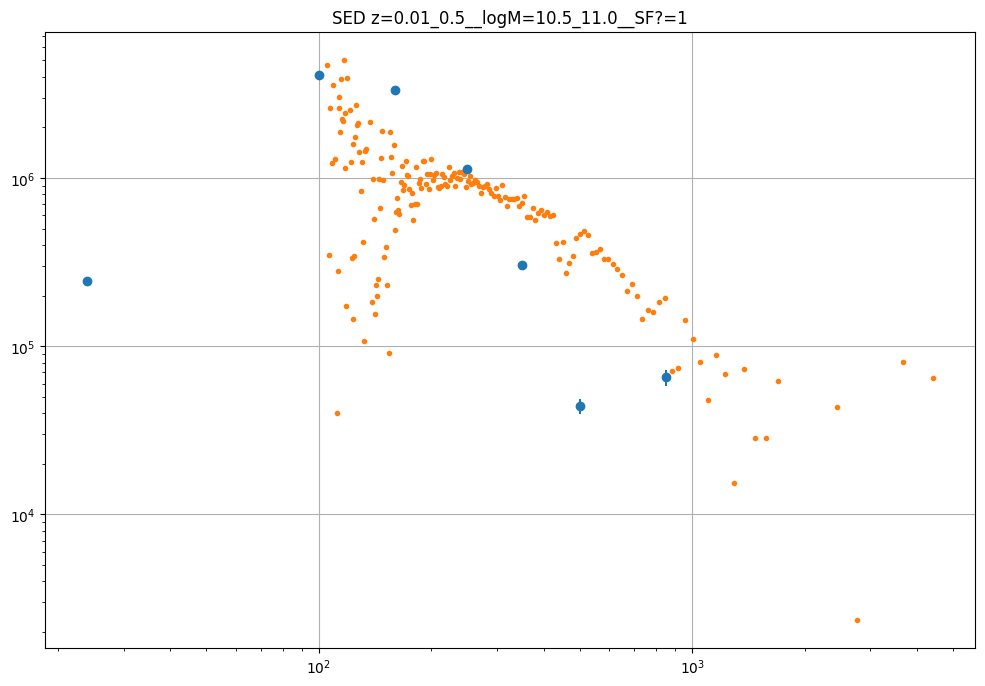

In [55]:
ind = 5
key_to_plot = list(results['seds'].keys())[ind]
plt.figure(figsize=(12, 8))
plt.errorbar(results['wvs'], results['seds'][key_to_plot] / beam_sizes, \
    yerr=results['stds'][key_to_plot] / beam_sizes, fmt='o', label=key_to_plot)
plt.plot(wavs, int1 * 1e6, label='FIRAS int1', marker='.', ls='none')
plt.title(f"SED {key_to_plot}")
plt.grid()
plt.loglog()
plt.show()
plt.close()